In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.set_printoptions(suppress=True)

%reload_ext autoreload
%autoreload 2

### Analysis of origianl model

#### Load the data

In [13]:
import os 
os.chdir('/ssd/users/mingzegao/clonaltrans/clonaltrans/')

path = '../trails/checkpoints/WeinrebConstRates/0226_145733/model_last.pt'
model = torch.load(path, map_location='cpu')
device = torch.device('cpu')

import os 
os.chdir('/ssd/users/mingzegao/clonaltrans/')

In [14]:
model.gpu_id = 'cpu'
p1, p2, p3 = model.get_matrix_K(model.K_type)
l1, l2, l3, l4, l5, l6 = model.compute_penalty_terms(2000, 1500, p1, p2, p3)
print (l1.item() / model.config['user_trainer']['alpha_1'])
print (l2.item() / model.config['user_trainer']['alpha_2'])
print (l3.item() / model.config['user_trainer']['alpha_3'])
print (l4.item() / model.config['user_trainer']['alpha_4'])
print (l5.item() / model.config['user_trainer']['alpha_5'])
print (l6.item() / model.config['user_trainer']['alpha_6'])

0.0
3.6457679271698
1.650089979171753
0.0081999933172483
0.5187869668006897
18.01682710647583


#### Visualize loss and correlations of each time point

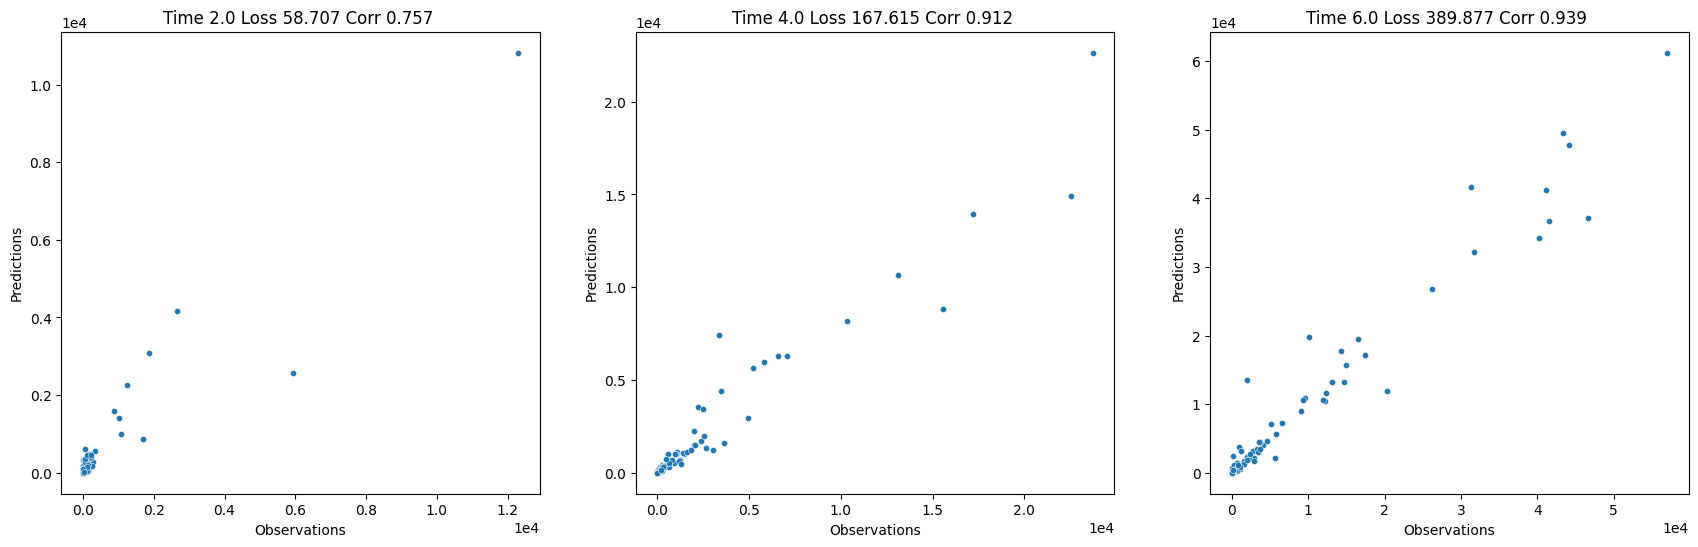

In [15]:
from clonaltrans.pl import mse_corr
mse_corr(model, save=False)

#### Visualize predicted streamlines (1 min)

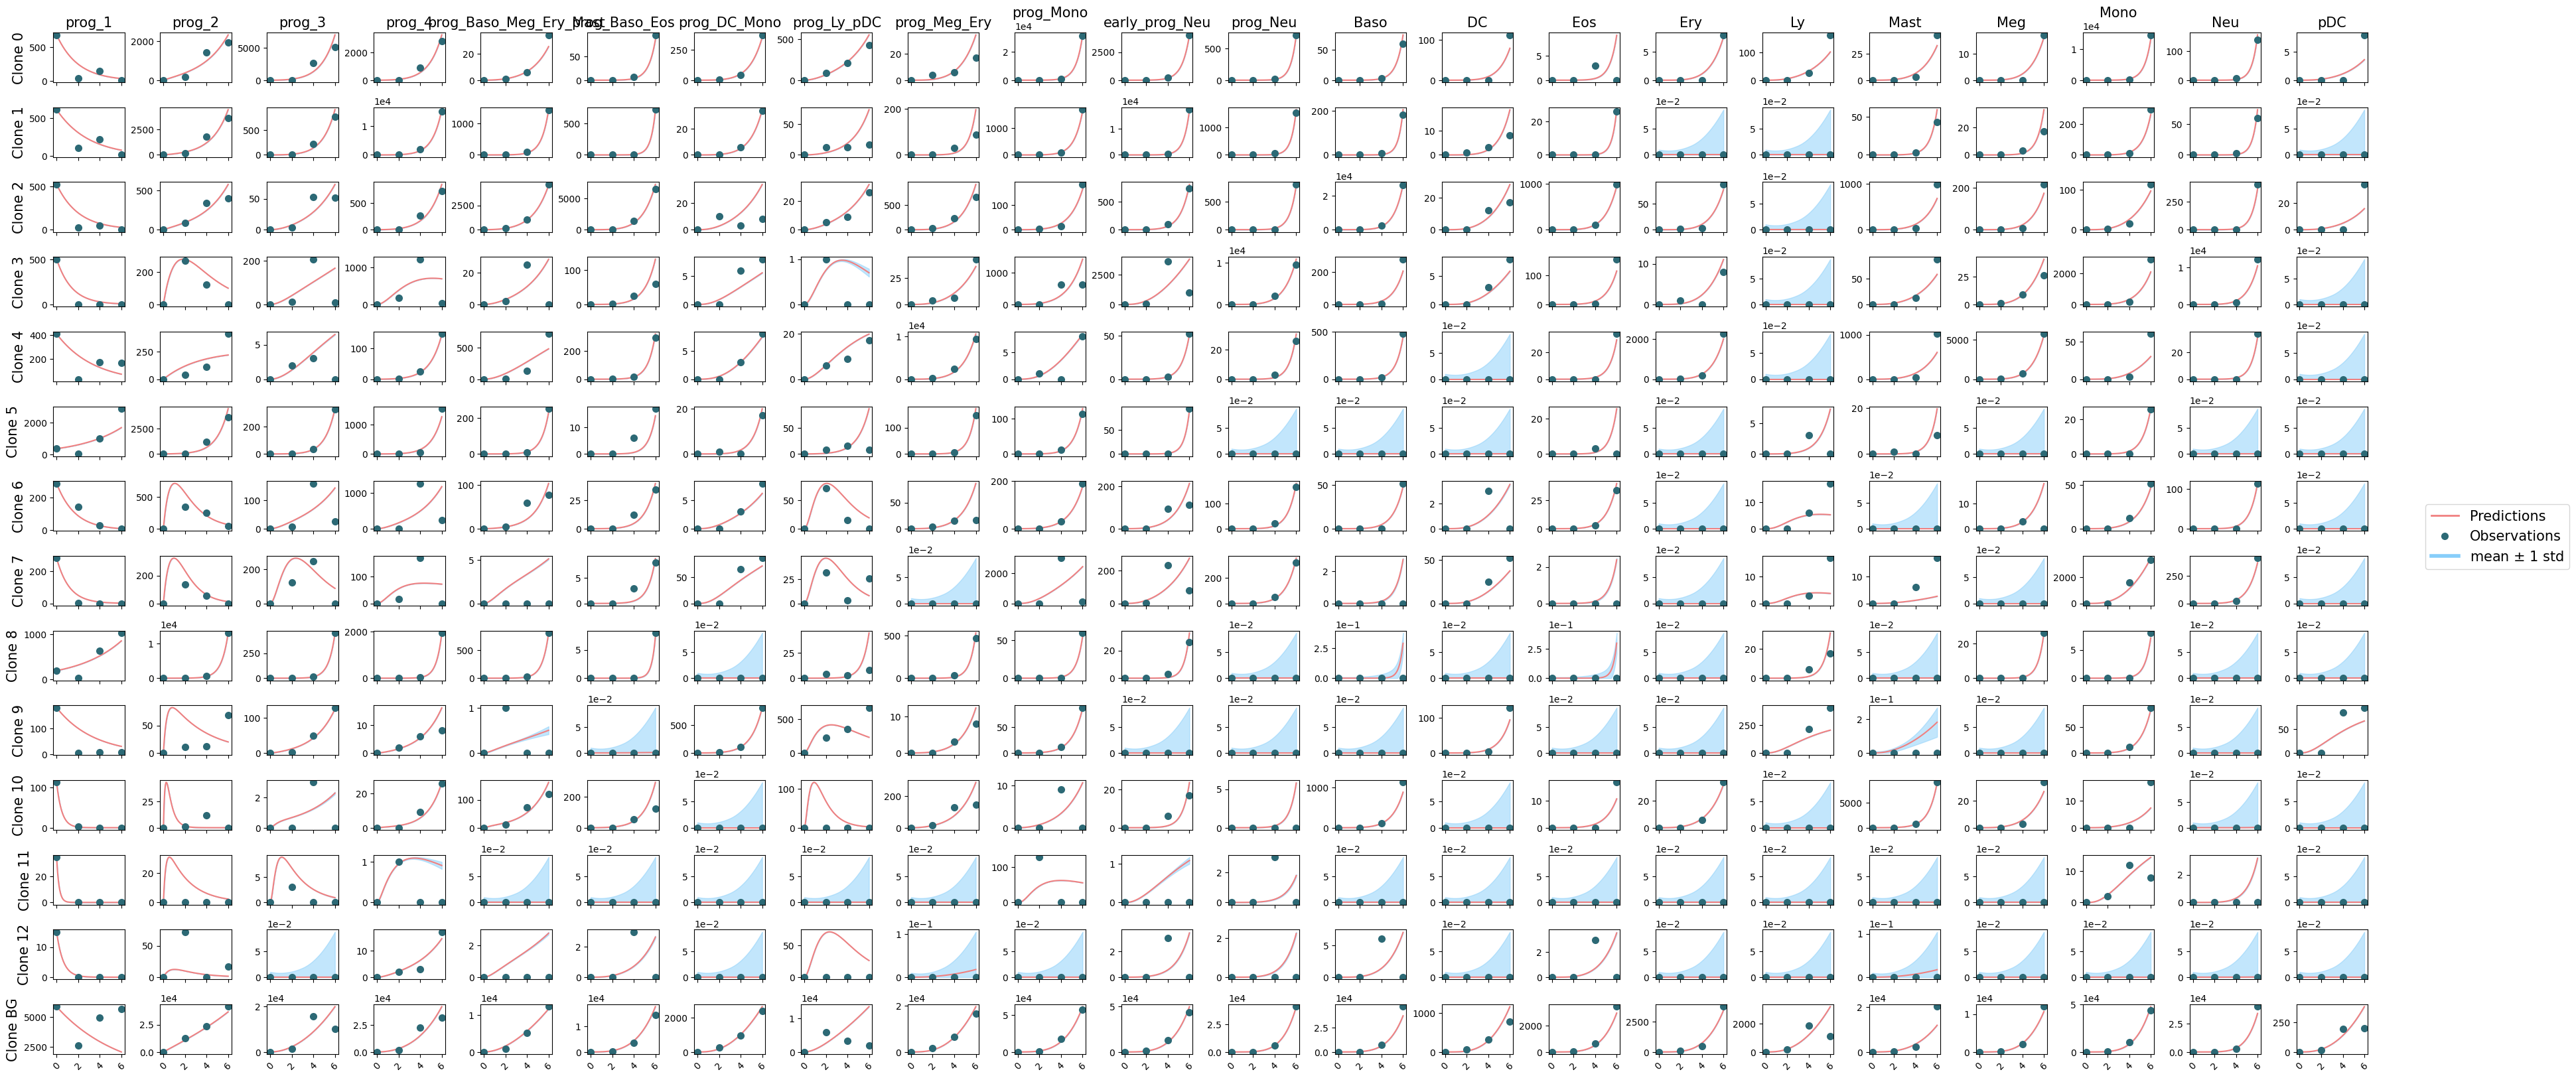

In [16]:
from clonaltrans.pl import grid_visualize
grid_visualize(model)

#### Clone specific transition rates in heatmap

You need to specific the index of clone to show (background clone is -1) as well as the time stamp of the transition rates. Rates in `const` mode doesn't change so `tpoint` parameter is useless.

Negative values were cut to the opposite of positive values for visualization purpose in color bar.

Note that a higher transition rate does not necessarily means a large number of cells are involved in this process, as this rate is a per capita change related to number of cells at that stage.

The model current have some limitations on penalizing rates where the cell counts of that population is actually 0, one may consider increasing the $beta$ parameter in config file. This phenomenon may leads to strange visualizations especially on Day 0.

---> Negative values were cut to the opposite of positive values for visualization purpose. <---


/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


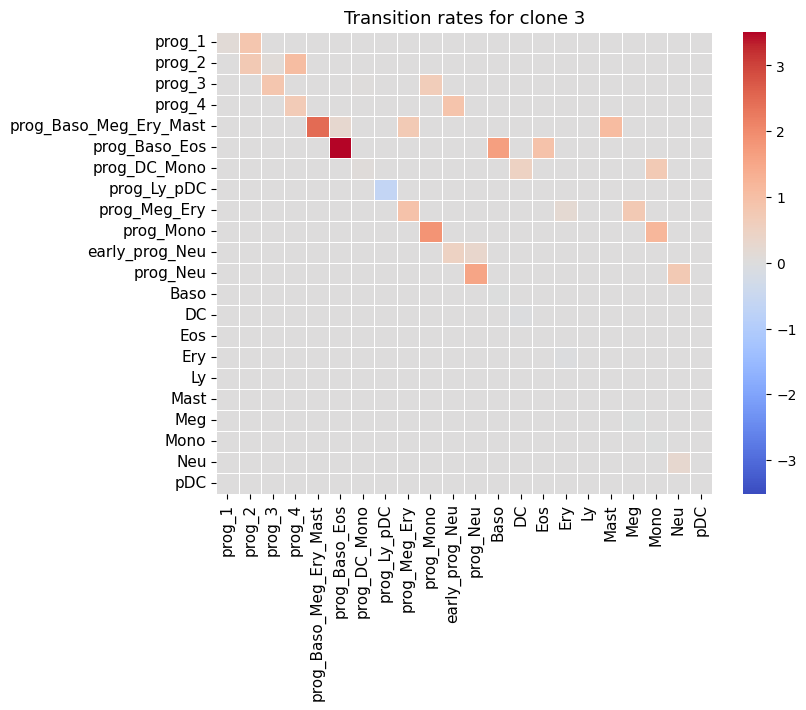

In [17]:
from clonaltrans.pl import clone_specific_K
clone_specific_K(model, index_clone=3, tpoint=5.0)

### Analysis of transition rates

#### Rates within PAGA

Those rates have a feasible upper bound for instance, 10 for differentiation rates and 6 for proliferation rates (adjustable in the configuration file). 

We want those rates within the PAGA graph not exceed the upper bounds.

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


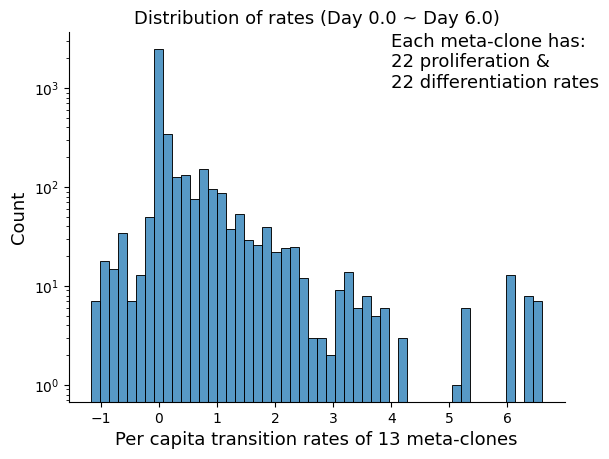

In [18]:
from clonaltrans.pl import rates_in_paga
rates_in_paga(model)

#### Rates on diagonal line of PAGA

Similarly, time point need to be specified. Not applicable to `const` mode.

Negative values were cut to the opposite of positive values for visualization purpose.

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


---> Negative values were cut to the opposite of positive values for visualization purpose. <---


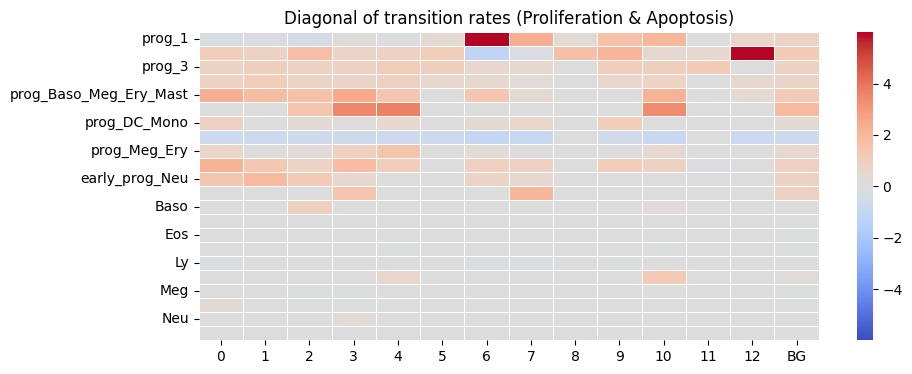

In [19]:
from clonaltrans.pl import rates_diagonal
rates_diagonal(model, tpoint=2)

#### Compare rates with background

During training, the background clone uses all the cell (including those were filtered at pre-processing stage). Ideally, the mean behaviour of those meta-clones should be similar with background cells and has reasonable pearson correlation score.

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


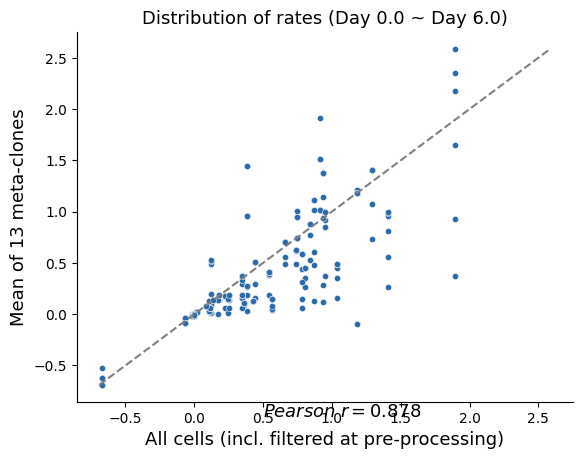

In [20]:
from clonaltrans.pl import compare_with_bg
compare_with_bg(model)

### Analysis of bootstrappping models

#### Load the data

In [2]:
import os 
os.chdir('./clonaltrans')

path = '../trails/checkpoints/ClonalTransRates/0204_190019/model_last.pt'
model = torch.load(path, map_location='cpu')
device = torch.device('cpu')

import os 
os.chdir('../')

In [3]:
model_list = []

for name in tqdm(os.listdir("./trails/checkpoints/BootstrappingCI/0205_104516")):
    try:
        temp = torch.load(f'./trails/checkpoints/BootstrappingCI/0205_104516/{name}', map_location='cpu')
        model_list.append(temp)
    except:
        pass

  0%|          | 0/232 [00:00<?, ?it/s]

100%|██████████| 232/232 [00:01<00:00, 193.53it/s]


In [4]:
len(model_list)

231

#### Test loss and correlation of trails

/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

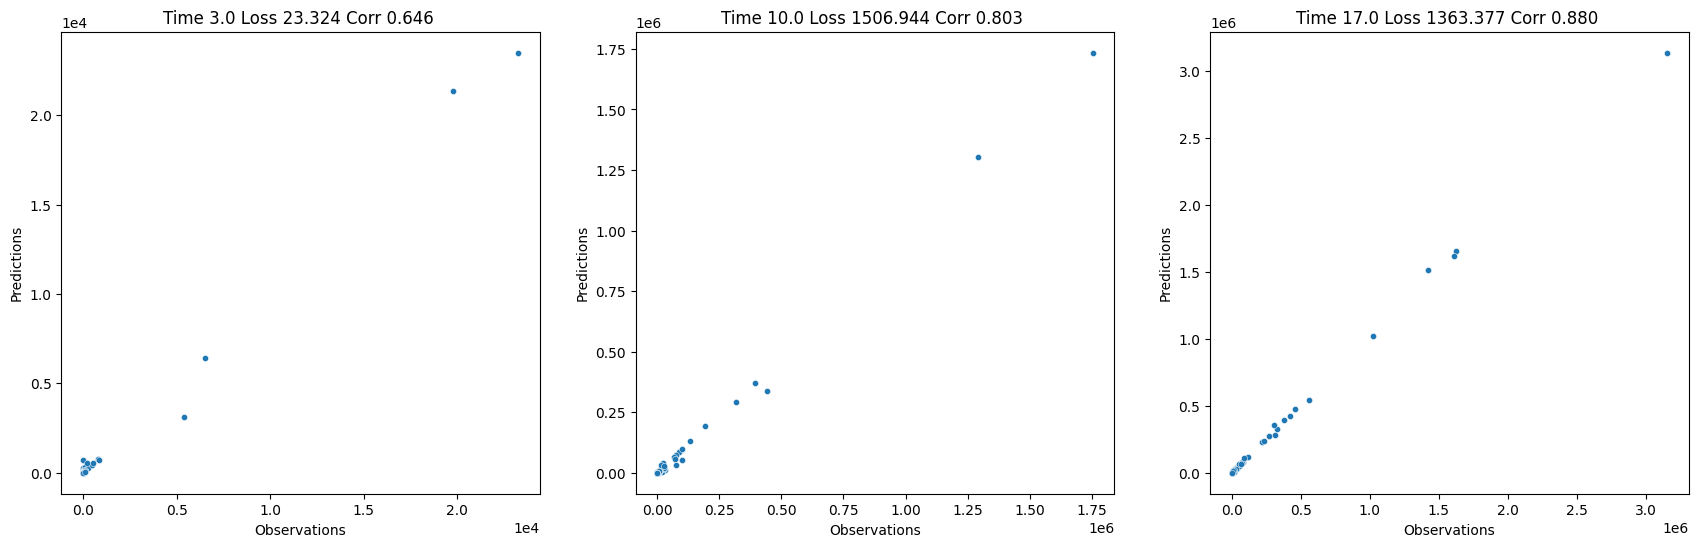

In [6]:
from clonaltrans.pl import mse_corr
test = model_list[5]
mse_corr(test, save=False)

#### Test streamlines of trails (1 min)

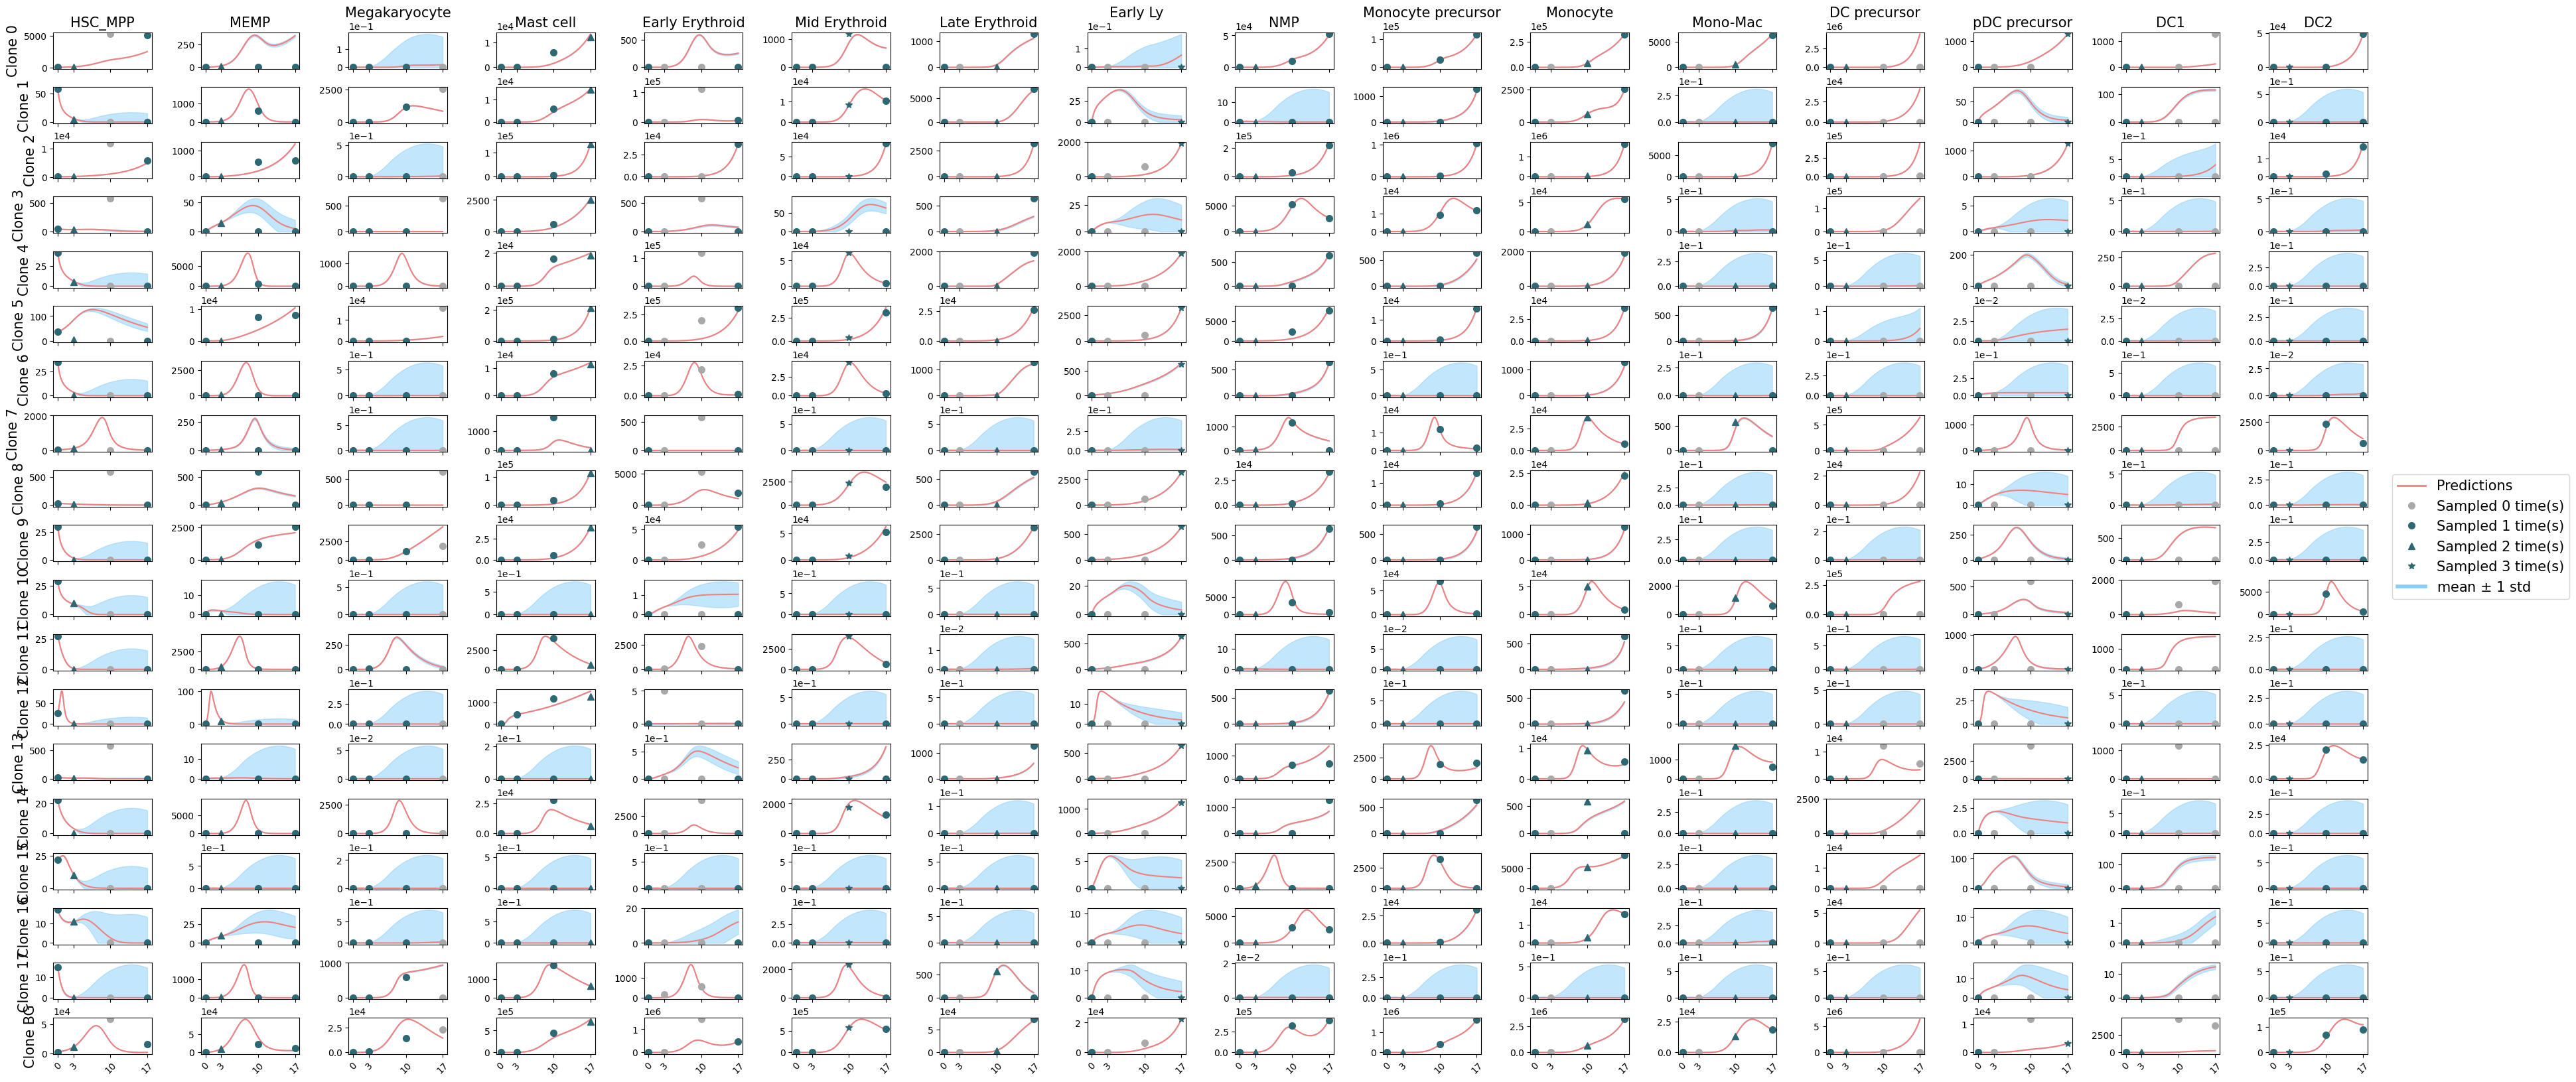

In [7]:
from clonaltrans.pl import grid_visualize
test = model_list[5]
grid_visualize(test)

#### Get 95% CI of transition rates 

One need to specify the clone index, outbound population index `pop_1`, inbound population index `pop_2` and time points (for `dynamic` mode). 

/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")
/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/home/mingzegao/anaconda3/envs/airbert/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


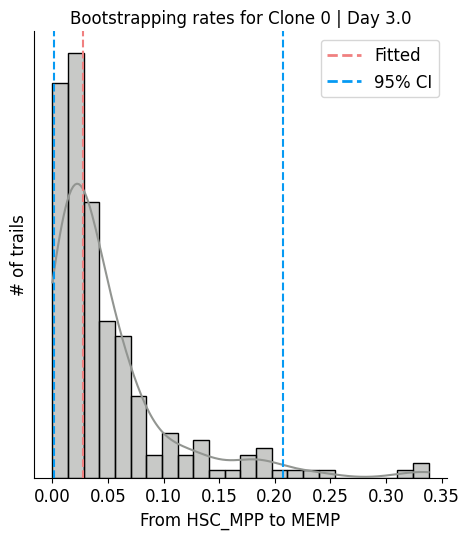

In [8]:
from clonaltrans.pl import parameter_ci
parameter_ci(
    model_list, 
    model, 
    index_clone=0, 
    pop_1=0, 
    pop_2=1, 
    tpoint=3.0
)

### Hypothesis testing for transition rates among clones

Based on the results of bootstrapping models, we could do hypothesis testing on those transition rates and see the difference among meta-clones. Again, you need to specify time points for `dynamic` mode.

Generally, for 2 distributions, Shapiro-Wilk test is used first to detect normality.\
If passed, then do the `student independent T test`.\
If not, then do the `Mann Whitney U rank test`.

The output is a heatmap of $-log_{10}(pvalues)$. Blank means stricly non-significant.

In [10]:
from clonaltrans.utils import get_boots_K_total
tpoint = torch.tensor([3.0]).to('cpu')
K_type = model.config['arch']['args']['K_type']
total_K, ref_K = get_boots_K_total(model_list, model, K_type, tpoint)

In [11]:
from clonaltrans.utils import clone_rates_diff_test
p_values, adjusted_p_values = clone_rates_diff_test(model, total_K, correct_method='fdr_bh')
print (p_values.shape, adjusted_p_values.shape)

(171, 16, 16) (35, 171)


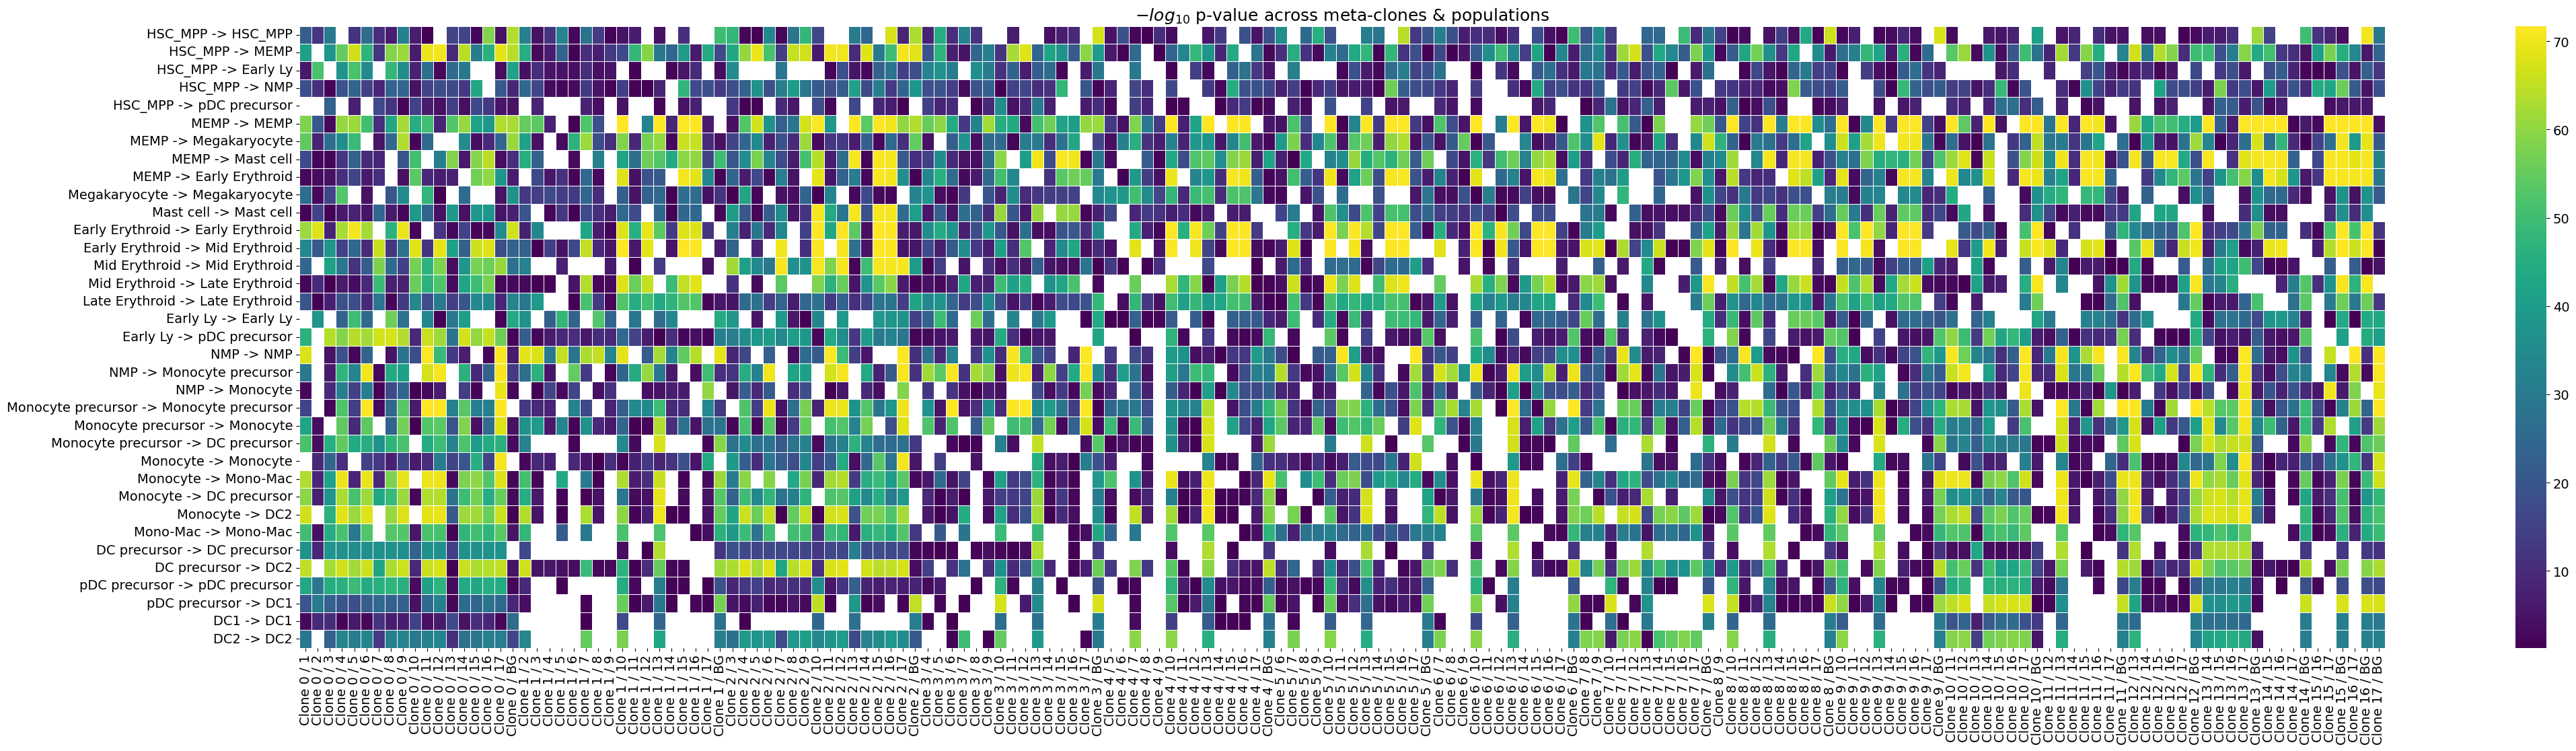

In [12]:
from clonaltrans.pl import clone_rates_diff_plot
clone_rates_diff_plot(adjusted_p_values, model)

### Links between HSC potential and rates

Meta-clone with different differentiation potential might behave differently regarding transition rates. Generally people believe the HSCs with multi-potential have lower rates whilst uni-potential HSCs tend to be more active.

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


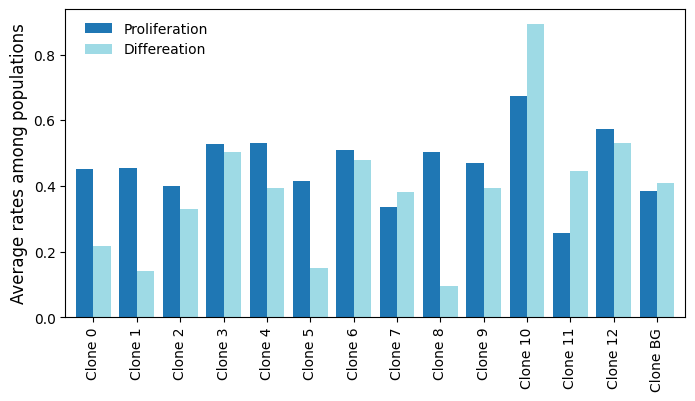

In [11]:
from clonaltrans.pl import get_rates_avg
get_rates_avg(model)